In [3]:
import importlib
import pandas as pd
import tensorflow as tf

import utils
import build_dataset as bd
import run_model

importlib.reload(run_model)

path_repo = r"/mnt/d/Maestría/Tesis/Repo/"

log_dir = f"{path_repo}/logs/mobnet_v3_20230905-231447"
models_dir = f"{path_repo}/data/data_out/models_by_epoch"
model_name = "mobnet_v3"
metadata = pd.read_csv(f"{path_repo}/data/data_out/size128_sample10/metadata.csv")
tiles = 1
size = 128
resizing_size = 128
bias = 2
sample = 1
to8bit = True
n_epochs = 20


modelpath = rf"{path_repo}/data/data_out/models_by_epoch/mobnet_v3_25"
model = tf.keras.models.load_model(
           modelpath, compile=True
        )
run_model.compute_custom_loss(
    model, metadata, tiles, size, resizing_size, bias, sample, to8bit
)

# run_model.compute_custom_loss_all_epochs(
#     log_dir,
#     models_dir,
#     model_name,
#     metadata,
#     tiles,
#     size,
#     resizing_size,
#     bias,
#     sample,
#     to8bit,
#     n_epochs,
# )

2023-09-06 12:13:29.561605: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600


In [240]:
importlib.reload(utils)
importlib.reload(bd)
datasets, extents = bd.load_satellite_datasets()
icpag = bd.load_icpag_dataset()
icpag = bd.assign_links_to_datasets(icpag, extents, verbose=False)
link = '068613306'

ds_name = icpag.loc[icpag.link == link, "dataset"].values[0]
ds = datasets[ds_name]

composition, point, boundaries, total_boundaries = utils.random_image_from_census_tract(
    ds, icpag, link, tiles=2, size=500, bias=4, to8bit=True
)

In [235]:
importlib.reload(utils)
importlib.reload(build_dataset)
)

d:\Maestría\Tesis\Repo\scripts\build_dataset.py:300: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x=slice(float(bbox_img["minx"]), float(bbox_img["maxx"])),
d:\Maestría\Tesis\Repo\scripts\build_dataset.py:301: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y=slice(float(bbox_img["maxy"]), float(bbox_img["miny"])),


In [45]:
link_dataset = build_dataset.get_dataset_for_link(icpag, datasets, link)

gdf_slice = icpag.loc[icpag["link"] == link]
# Get bounds of the shapefile's polygon
bbox_img = gdf_slice.bounds

link_dataset.sel(
        x=slice(float(bbox_img["minx"]), float(bbox_img["maxx"])),
        y=slice(float(bbox_img["maxy"]), float(bbox_img["miny"])),
    )

C:\Users\ofici\AppData\Local\Temp\ipykernel_17288\2371184968.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x=slice(float(bbox_img["minx"]), float(bbox_img["maxx"])),
C:\Users\ofici\AppData\Local\Temp\ipykernel_17288\2371184968.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y=slice(float(bbox_img["maxy"]), float(bbox_img["miny"])),


<xarray.Dataset>
Dimensions:      (band: 4, x: 1114, y: 936)
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 -58.55 -58.55 -58.55 ... -58.54 -58.54 -58.54
  * y            (y) float64 -34.53 -34.53 -34.53 ... -34.53 -34.53 -34.53
    spatial_ref  int32 ...
Data variables:
    band_data    (band, y, x) float32 ...

In [4]:
import numpy as np
preds = np.array([[ 0.30624747],
 [ 0.58681476],
 [ 0.39375266],
 [ 0.64122117],
 [ 0.46575212],
 [ 0.5323721 ],
 [ 0.58222896],
 [ 0.5892662 ],
 [ 0.21026662],
 [ 0.4146009 ],
 [ 0.24046373],
 [ 0.51720876],
 [ 0.3714393 ],
 [ 0.26501536],
 [ 0.02480393],
 [ 0.27916503],
 [ 0.4273763 ],
 [-0.04797403],
 [ 0.40898347],
 [-0.01549809],
 [ 0.4444059 ],
 [ 0.19806558],
 [ 0.48352647],
 [ 0.20143345],
 [ 0.48111975],
 [ 0.18594003],
 [ 0.44016653],
 [ 0.51617116],
 [ 0.30305266],
 [ 0.13224253],
 [ 0.18047343],
 [ 0.48688462]])

In [6]:
np.mean(preds - 10)

-9.648531599062501

In [17]:
import importlib
import build_dataset
import utils
import shapely.geometry as sg
importlib.reload(build_dataset)
importlib.reload(utils)
link = '065150101'
ds = build_dataset.get_dataset_for_link(icpag, datasets, link)
images, points, bounds = build_dataset.get_gridded_images_for_link(
    ds, icpag, link, tiles=1, size=400, resizing_size=100, bias=4, sample=1, to8bit=True
)


import folium
m = icpag[icpag.link == link].explore(
        tiles="https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}", attr="ESRI",

)
for poly_bound in bounds:
        poly = sg.Polygon(
                poly_bound[0] 
        )
        folium.GeoJson(poly, ).add_to(m)

# Add control for switching between layers
folium.LayerControl().add_to(m)
m

d:\Maestría\Tesis\Repo\scripts\build_dataset.py:306: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x=slice(float(bbox_img["minx"]), float(bbox_img["maxx"])),
d:\Maestría\Tesis\Repo\scripts\build_dataset.py:307: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y=slice(float(bbox_img["maxy"]), float(bbox_img["miny"])),


In [9]:
import pandas as pd
metadata = pd.read_csv(r"D:\Maestría\Tesis\Repo\data\data_out\size512_sample5\metadata.csv")

In [16]:
link = 20010101
metadata.loc[metadata.link == link, 'var'].values[0]

-0.086682975

In [217]:
import os
os.getcwd()

'd:\\Maestría\\Tesis\\Repo\\scripts'

In [220]:
import pandas as pd
pd.read_csv("./data/icpag.csv").head()

FileNotFoundError: [Errno 2] No such file or directory: './data/icpag.csv'

In [228]:
from tensorflow import keras
path_dataout = r"D:\Maestría\Tesis\Repo\data\data_out"
model_path=fr"{path_dataout}/models/mobnet_v3_20230831-172738"

keras.models.load_model(model_path)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 13: invalid continuation byte

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
img = np.load(r"D:\Maestría\Tesis\Repo\data\data_out\size128_sample10\020010103_1.npy")
img = np.moveaxis(img, 0, 2)[:,:,:3]
# equalize hist
img = skimage.exposure.equalize_hist(img)
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Maestría\\Tesis\\Repo\\data\\data_out\\size128_sample10\\020010103_1.npy'

In [196]:
len(images)

50

In [129]:
import earthpy.plot as ep

# ep.plot_rgb(images[0], rgb=[0, 1, 2], title="RGB Image", stretch=True)


AttributeError: 'tuple' object has no attribute 'shape'

In [6]:
composition

array([[[15, 15, 15, ..., 30, 30, 30],
        [14, 14, 14, ..., 31, 30, 30],
        [13, 13, 13, ..., 31, 30, 30],
        ...,
        [21, 22, 23, ..., 24, 26, 27],
        [21, 23, 23, ..., 26, 28, 29],
        [21, 22, 23, ..., 30, 30, 31]],

       [[17, 17, 16, ..., 24, 24, 24],
        [16, 16, 16, ..., 25, 24, 25],
        [15, 15, 15, ..., 25, 25, 25],
        ...,
        [21, 22, 22, ..., 24, 26, 26],
        [22, 22, 23, ..., 25, 27, 27],
        [22, 22, 23, ..., 27, 27, 27]],

       [[12, 11, 11, ..., 19, 19, 19],
        [11, 11, 11, ..., 19, 19, 19],
        [10, 10, 10, ..., 19, 19, 19],
        ...,
        [15, 15, 15, ..., 18, 19, 20],
        [15, 15, 15, ..., 19, 20, 21],
        [15, 15, 16, ..., 21, 21, 21]],

       [[77, 74, 71, ..., 65, 65, 66],
        [75, 73, 71, ..., 65, 65, 66],
        [73, 71, 70, ..., 66, 65, 66],
        ...,
        [77, 80, 79, ..., 57, 57, 55],
        [78, 80, 79, ..., 55, 54, 52],
        [77, 78, 79, ..., 55, 51, 49]]], dtyp

In [1]:
import pandas as pd
from dotenv import dotenv_values
image_size = 200
sample_size = 1

pd.set_option("display.max_columns", None)
env = dotenv_values("D:/Maestría/Tesis/Repo/scripts/globals.env")

path_proyecto = env["PATH_PROYECTO"]
path_datain = env["PATH_DATAIN"]
path_dataout = env["PATH_DATAOUT"]
path_scripts = env["PATH_SCRIPTS"]
path_satelites = env["PATH_SATELITES"]
path_logs = env["PATH_LOGS"]
path_outputs = env["PATH_OUTPUTS"]

# df = pd.read_csv(
#     rf"D:\Maestría\Tesis\Repo\data\data_out\size500_sample1\metadata.csv"
# )


c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


Links without images: 3448 out of 11666


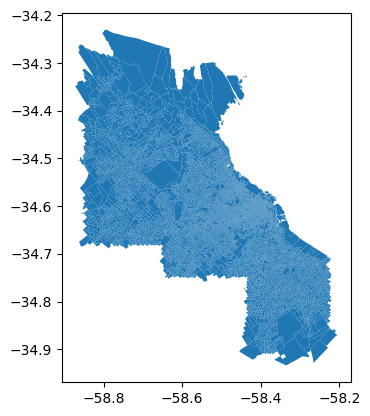

In [2]:
import importlib
import build_dataset
importlib.reload(build_dataset)
variable = "ln_pred_inc_mean"
datasets, extents = build_dataset.load_satellite_datasets()
icpag = build_dataset.load_icpag_dataset(variable)
icpag = build_dataset.assign_links_to_datasets(icpag, extents)



In [13]:
icpag[icpag.AREA >= 4000000]

(59, 154)

In [9]:
icpag.AREA.quantile(.99)

2044845.750000006

d:\Maestría\Tesis\Repo\scripts\build_dataset.py:79: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  icpag.loc[icpag.centroid.within(bbox), "dataset"] = name
d:\Maestría\Tesis\Repo\scripts\build_dataset.py:79: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  icpag.loc[icpag.centroid.within(bbox), "dataset"] = name


Links without images: 3448 out of 15114
Benchmarking MSE against the mean
Train MSE:  0.758103


UnknownError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} NameError: name 'my_test' is not defined
Traceback (most recent call last):

  File "c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 268, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "d:\Maestría\Tesis\Repo\scripts\run_model.py", line 267, in generate_image
    print(my_test)
          ^^^^^^^

NameError: name 'my_test' is not defined


	 [[{{node PyFunc}}]] [Op:IteratorGetNext] name: 

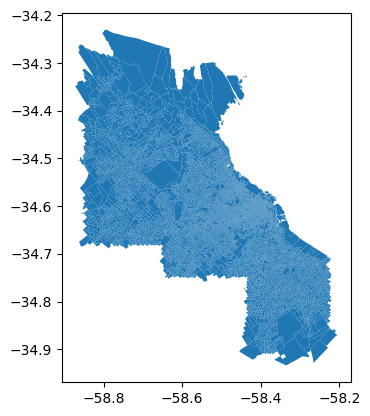

In [17]:
import run_model
import importlib
importlib.reload(run_model)

kind="reg"
image_size = 500
resizing_size = 200
my_test = "ddddddd"
train_dataset, test_dataset, filenames = run_model.create_and_build_datasets(
    kind=kind,
    image_size=image_size,
    resizing_size=resizing_size,
    batch_size=32,
)



In [9]:
test["type"].value_counts()

type
train    9689
test     1977
Name: count, dtype: int64

In [29]:
icpag['type'].value_counts()

type
train    9689
test     1977
Name: count, dtype: int64

In [274]:
import numpy as np
imgs = np.load(r"D:\Maestría\Tesis\Repo\outputs\examples_0_img.npy")
labs = np.load(r"D:\Maestría\Tesis\Repo\outputs\examples_0_lab.npy")

In [275]:
def process_image(file_path, label):
    import cv2
    
    img = np.load(file_path)
    img = np.moveaxis(
        img, 0, 2
    )  # Move axis so the original [4, 512, 512] becames [512, 512, 4]
    img = cv2.resize(
        img, dsize=(resizing_size, resizing_size), interpolation=cv2.INTER_CUBIC
    )

    img = tf.convert_to_tensor(img / 255, dtype=tf.float32)
    label = tf.cast(label, tf.float32)

    return img, label

In [276]:
import tensorflow as tf
import numpy as np
resizing_size = 200
img, label = process_image(r"D:\Maestría\Tesis\Repo\data\data_out\size500_sample1\062742004_0.npy", 10)

In [277]:
import tensorflow_datasets as tfds
example = tfds.as_numpy(img)

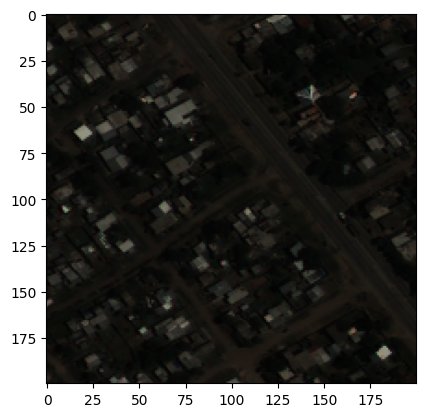

In [278]:
import matplotlib.pyplot as plt

plt.imshow(example[:,:,0:3])

In [279]:
import os
path = r"D:\Maestría\Tesis\Repo\data\data_out\size500_sample1"
files = [f"{path}\{file}" for file in os.listdir(path)]

labels = [0] * len(files)

In [280]:
dataset = tf.data.Dataset.from_tensor_slices((files, labels))


In [281]:
dataset = dataset.map(
    lambda file, label: tf.numpy_function(
        process_image, [file, label], (tf.float32, tf.float32)
    )
)  # Parse every image in the dataset using `map`

imgs = []
labs = []
for x in dataset.take(1):
    imgs += [tfds.as_numpy(x)[0]]
    labs += [tfds.as_numpy(x)[1]]
    
imgs
#### HASTA ACA TODO GENIAL


[array([[[0.01960784, 0.02352941, 0.01960784, 0.01568628],
         [0.01960784, 0.02352941, 0.02352941, 0.01568628],
         [0.01568628, 0.01960784, 0.01960784, 0.01568628],
         ...,
         [0.03529412, 0.03137255, 0.02745098, 0.03529412],
         [0.14901961, 0.1254902 , 0.10980392, 0.14117648],
         [0.21176471, 0.1882353 , 0.16862746, 0.2       ]],
 
        [[0.01960784, 0.02352941, 0.02352941, 0.01568628],
         [0.01960784, 0.01960784, 0.02352941, 0.01568628],
         [0.01960784, 0.01960784, 0.02352941, 0.01568628],
         ...,
         [0.02352941, 0.02352941, 0.02352941, 0.02352941],
         [0.11764706, 0.11764706, 0.10588235, 0.10980392],
         [0.20784314, 0.20392157, 0.18431373, 0.19215687]],
 
        [[0.01960784, 0.01960784, 0.01960784, 0.01568628],
         [0.01960784, 0.01960784, 0.02352941, 0.01568628],
         [0.01960784, 0.01960784, 0.02352941, 0.01568628],
         ...,
         [0.01960784, 0.02745098, 0.02352941, 0.01960784],
        

In [282]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
        [
            layers.RandomFlip(
                "horizontal_and_vertical",
                seed=825,
                input_shape=(resizing_size, resizing_size, 4),
            ),
            # layers.RandomTranslation(0.3, 0.3, fill_mode="reflect", seed=825),
            # layers.RandomHeight(0.3),
            # layers.RandomWidth(0.3),
            # layers.RandomZoom(0.3, seed=825),
            # layers.RandomContrast(0.3, seed=825),
            # layers.RandomBrightness(0.05, value_range=(0,1), seed=825),
            # layers.RandomCrop(image_size, image_size, seed=825),
        ],
        name="data_augmentation",
    )

In [ ]:
train_dataset = (
    dataset.shuffle(round(len(files[0]) / 10))
    .batch(32)
    .map(lambda x, y: (data_augmentation(x), y))
    .prefetch(tf.data.AUTOTUNE)
)


In [99]:
import utils

ds = datasets[icpag.loc[icpag.link == "065150214", "dataset"].values[0]]
composition, point, boundaries, total_boundaries = utils.random_image_from_census_tract(
    ds, icpag, "065150214", tiles=2, size=500, bias=4, to8bit=True
)

In [105]:
total_boundaries

(-58.71318981481478,
 -58.71203703703701,
 -34.47049074074073,
 -34.46933796296295)

In [ ]:
imgs = []
labs = []
for x in train_dataset.take(1):
    imgs += [tfds.as_numpy(x)[0]]
    labs += [tfds.as_numpy(x)[1]]

print(imgs[0][0].shape)    
plt.imshow(imgs[0][0][:,:,:3])

KeyboardInterrupt: 

In [294]:
sample_size = 1
image_size = 500
path_dataout = r"D:/Maestría/Tesis/Repo/data/data_out"

df = pd.read_csv(
    rf"{path_dataout}/size{image_size}_sample{sample_size}/metadata.csv"
)


In [ ]:
def point_column_to_x_y(df):
    df.point = df.point.str.replace("\(|\)", "", regex=True).str.split(",")
    df['x'] = df.point.str[0]
    df['y']= df.point.str[1]
    return df[['x', 'y']]

In [ ]:
import geopandas as gpd
df = df.dropna(how="any").reset_index(drop=True)
df[['x', 'y']] = point_column_to_x_y(df)
df.x, df.y = df.x.astype(float), df.y.astype(float)


In [296]:
df

,Unnamed: 0,link,sample,image,var,point,tiles_boundaries,Test
0,020010101_0,20010101,0,/mnt/d/Maestría/Tesis/Repo/data/data_out/size5...,-0.086683,"(-58.36238116910161, -34.58884655245576)","[((-58.363537037037005, -34.59), (-58.36353703...",False
1,020010201_0,20010201,0,/mnt/d/Maestría/Tesis/Repo/data/data_out/size5...,-0.325601,"(-58.386171721350806, -34.57841349868801)","[((-58.38732870370367, -34.579564814814816), (...",False
2,020010202_0,20010202,0,/mnt/d/Maestría/Tesis/Repo/data/data_out/size5...,-0.527712,"(-58.38814918645059, -34.578990796742225)","[((-58.389305555555524, -34.580143518518526), ...",False
3,020010203_0,20010203,0,/mnt/d/Maestría/Tesis/Repo/data/data_out/size5...,-0.469738,"(-58.38499357546205, -34.580723241158275)","[((-58.386152777777745, -34.581875000000004), ...",False
4,020010204_0,20010204,0,/mnt/d/Maestría/Tesis/Repo/data/data_out/size5...,-0.511739,"(-58.38297055443168, -34.5805397457326)","[((-58.3841296296296, -34.58169444444445), (-5...",False
...,...,...,...,...,...,...,...,...
11661,068613306_0,68613306,0,/mnt/d/Maestría/Tesis/Repo/data/data_out/size5...,0.886153,"(-58.5451923922029, -34.53113619075915)","[((-58.54635185185185, -34.53228703703705), (-...",False
11662,068613307_0,68613307,0,/mnt/d/Maestría/Tesis/Repo/data/data_out/size5...,0.565562,"(-58.541301530611754, -34.53225356629209)","[((-58.542458333333336, -34.53340740740742), (...",False
11663,068613308_0,68613308,0,/mnt/d/Maestría/Tesis/Repo/data/data_out/size5...,0.672384,"(-58.54734151688227, -34.53473997163151)","[((-58.5485, -34.53589351851853), (-58.5485, -...",False
11664,068613309_0,68613309,0,/mnt/d/Maestría/Tesis/Repo/data/data_out/size5...,0.480133,"(-58.54694849029955, -34.52973732921213)","[((-58.54810648148148, -34.530888888888896), (...",False


In [2]:
import build_dataset
import pandas as pd
path_dataout = r"D:/Maestría/Tesis/Repo/data/data_out"

# build_dataset.build_dataset(200, 1, variable="ln_pred_inc_mean")
df = pd.read_csv(
    rf"{path_dataout}/size200_sample1/metadata.csv"
)

metadata = build_dataset.split_train_test(df)

size of test dataset: 19.98626963013816 %


Cargando datasets...


d:\Maestría\Tesis\Repo\scripts\build_dataset.py:79: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  icpag.loc[icpag.centroid.within(bbox), "dataset"] = name
d:\Maestría\Tesis\Repo\scripts\build_dataset.py:79: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  icpag.loc[icpag.centroid.within(bbox), "dataset"] = name


Links without images: 3448 out of 15114
Generando imágenes...


100%|██████████| 11666/11666 [1:01:16<00:00,  3.17it/s]


train_block
2.0    6374
3.0    1488
1.0    1326
Name: count, dtype: int64
Size of test dataset: 15.53%
 Size of train dataset: 75.10%
 Deleted images due to train/test overlapping: 9.37%

Se creó D:/Maestría/Tesis/Repo/data/data_out/size500_sample1/metadata.csv y las imágenes para correr el modelo: size500_sample1.


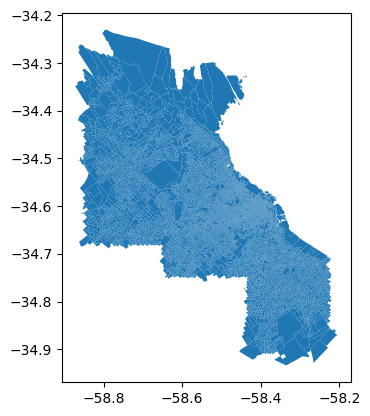

In [106]:
import importlib
import build_dataset
import utils
importlib.reload(build_dataset)
importlib.reload(utils)
importlib.reload(build_dataset)
build_dataset.build_dataset(500, 1, tiles=2, bias=4, variable="ln_pred_inc_mean")

In [81]:
import importlib
importlib.reload(build_dataset)
df = pd.read_csv(
    rf"{path_dataout}/size500_sample1/metadata.csv"
)
# df = df.drop(columns="Test")
# df = build_dataset.split_train_test(df)